In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')

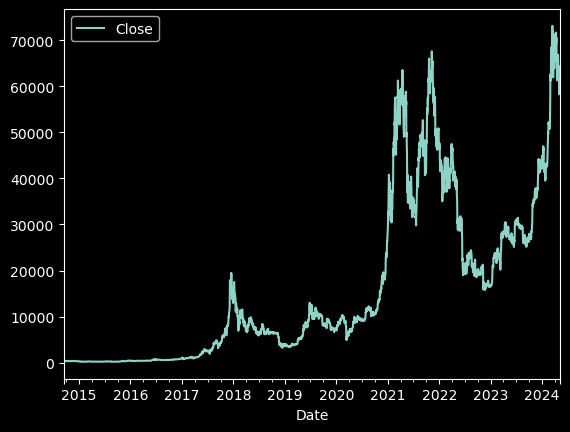

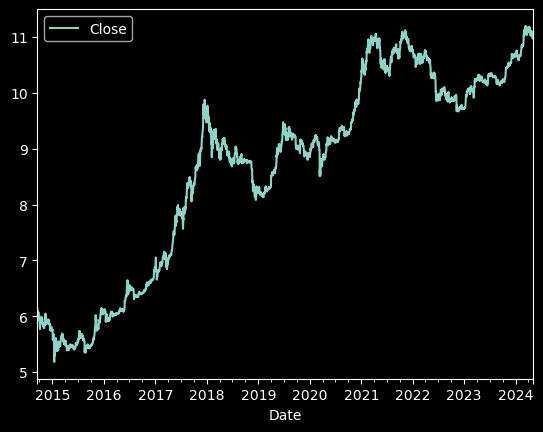

In [5]:
data = pd.read_csv('BTC-USD.csv',index_col = 'Date',parse_dates=True)
data[['Close']].plot()
plt.show()
np.log(data[['Close']]).plot()
plt.show()

                   y         x
Date                          
2014-09-19 -0.069843 -0.071926
2014-09-20  0.035735 -0.069843
2014-09-21 -0.024659  0.035735
2014-09-22  0.008352 -0.024659
2014-09-23  0.083647  0.008352
...              ...       ...
2024-05-03  0.063704  0.014925
2024-05-04  0.015927  0.063704
2024-05-05  0.002186  0.015927
2024-05-06 -0.013574  0.002186
2024-05-07 -0.001518 -0.013574

[3519 rows x 2 columns]
y    0.900596
x    0.900078
dtype: float64


C:\Users\rui_j\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


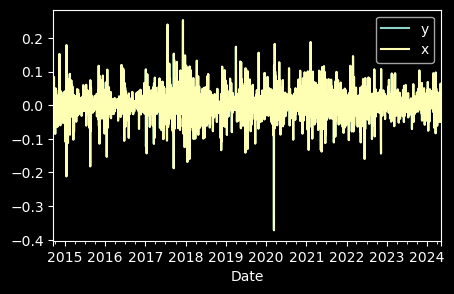

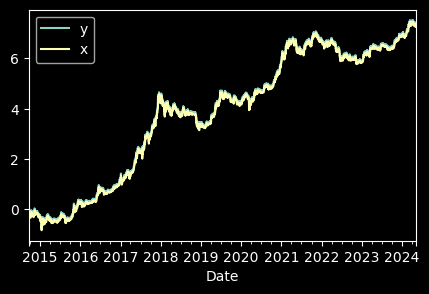

In [53]:
px = data[['Close']].copy(deep=True)
# px = px.resample('W-FRI').last()
px = px.pct_change()
px = px.dropna()
px.columns = ['y']
px['x'] = px['y'].shift(1)
px = px.dropna()
print(px)
print(np.sqrt(250)*np.mean(px)/np.std(px))

px.plot()
plt.show()
np.cumsum(px).plot()
plt.show()


In [54]:
import seqm

In [64]:
dataset=seqm.Dataset({'dataset 1':px})

emissions = [
            seqm.ConditionalGaussianEmission(), 
            seqm.ConditionalGaussianEmission(),
            ]
model = seqm.HMM(emissions = emissions, n_gibbs = 1000)

#model = seqm.ConditionalGaussianMixture(n_states = 2, n_gibbs = 1000)
model = seqm.ConditionalGaussian()

model = seqm.MovingAverage(windows = [5,10,20], quantile = 0.99, vary_weights = True)

model_pipes=seqm.ModelPipes(model)
for key in dataset.keys():
    model_pipe_ = seqm.ModelPipe() 
    model_pipes[key] = model_pipe_

paths=dataset.cvbt(
                model_pipes, 
                k_folds=4, 
                seq_path=False, 
                start_fold=0, 
                n_paths=4, 
                burn_fraction=0.1, 
                min_burn_points=3, 
                share_model=True, 
                view_models=False
                )


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.32it/s]


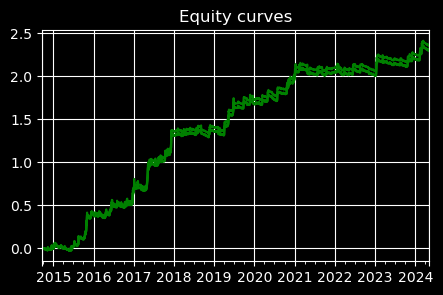

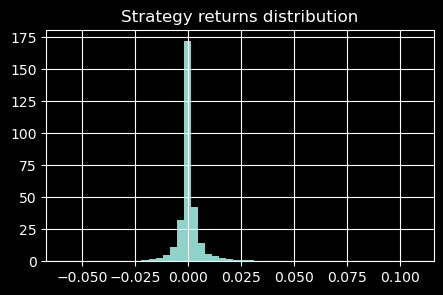

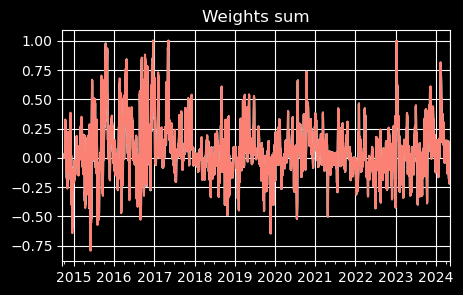

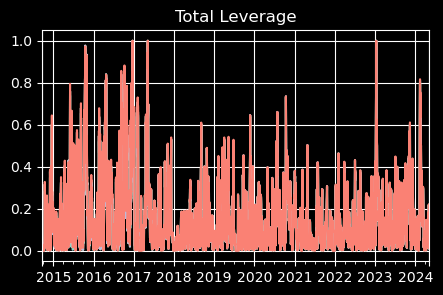


** ACCEPT STRATEGY **


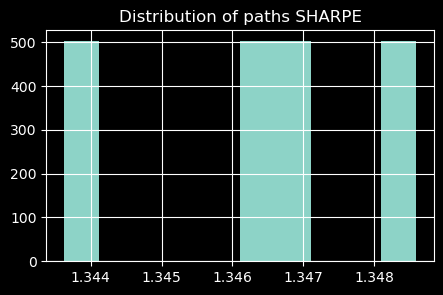

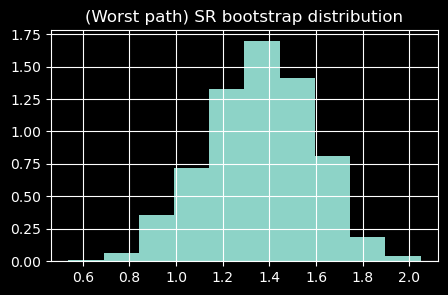


** PERFORMANCE SUMMARY **

Return:  0.16393710175981685
Standard deviation:  0.12177320729262212
Sharpe:  1.3462493548837429



In [65]:
seqm.post_process(paths,pct_fee=0.,seq_fees=False,sr_mult=np.sqrt(250),n_boot=1000)